1. 根据课上演示内容，完善以下代码。假设我们想模拟一家电子商务公司的客户交易数据集。我们可以使用numpy和pandas库来生成数据并将其存储在DataFrame中。接下来，我们可以生成一个具有10000行的模拟数据集，其中每行代表一个客户交易：

id
4345    13.145008
8867    14.185261
8948    16.118839
9136    16.839896
1331    19.191591
9289    20.922282
8953    21.480181
2399    22.117097
3926    22.277465
513     22.403415
Name: amount, dtype: float64


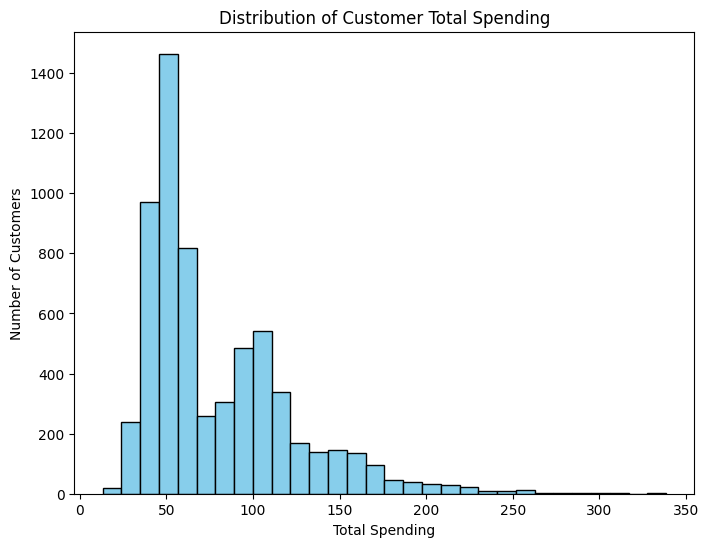

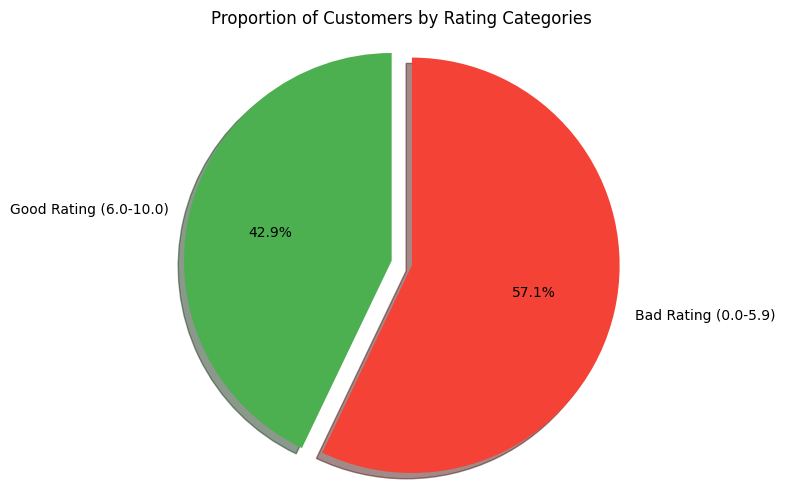

In [3]:
# 添加需要导入的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置随机数种子，保证每次运行生成的数据一致（可复现性）
np.random.seed(123)

# ==============================
# 1. 生成模拟数据
# ==============================

# 随机生成 10000 个顾客ID（范围 1~10000 之间，可能有重复）
ids=np.random.randint(low=1,high=10001,size=10000)




# 随机生成 10000 个购买金额，服从均值 50、标准差 10 的正态分布
amounts=np.random.normal(loc=50,scale=10,size=10000)



# 随机生成 10000 个购买日期，范围在 2022-01-01 ~ 2022-12-31 之间
dates=np.random.choice(pd.date_range('2022-01-01','2022-12-31'),size=10000)



# 随机生成 10000 个商品类别（电子产品/服装/图书）
categories=np.random.choice(['electronics', 'clothing', 'books'],size=10000)




# 随机生成 10000 个购物满意度评分（0-10分，保留一位小数）
# 这里使用均匀分布模拟
ratings = np.round(np.random.uniform(low=0, high=10, size=10000), 1)



# ==============================
# 2. 组装为 DataFrame
# ==============================

# 把数据整理成 DataFrame（类似数据库表格）
df=pd.DataFrame({
    'id':ids,
    'date':dates,
    'amount':amounts,
    'categories':categories,
    'rating':ratings
})






# ==============================
# 3. 统计分析：每位顾客总支出
# ==============================

# 按 customer_id 分组，汇总每个顾客的总支出
totals = df.groupby(['id'])['amount'].sum()

# 对总支出进行升序排序（从低到高）
totals = totals.sort_values(ascending=True)

# 打印支出总额排名后10的顾客
print(totals.head(10))





# ==============================
# 4. 可视化：顾客总支出的直方图
# ==============================
plt.figure(figsize=(8, 6))
plt.hist(totals, bins=30, color='skyblue', edgecolor='black')

# 添加英文标题和坐标轴标签
plt.title('Distribution of Customer Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')

# 显示图表
plt.show()

# ==============================
# 5. 客户分层：好评客户（满意度 6.0~10.0）
# ==============================

# 选定满意度评分为 [6.0, 10.0] 的客户（好评客户）
good_rating_mask = (df['rating'] >= 6.0) & (df['rating'] <= 10.0)
good_rating_customers = df[good_rating_mask]
bad_rating_customers = df[~good_rating_mask]

# 计算好评和非好评客户的数量
good_count = good_rating_customers['id'].nunique()  # 去重计数
bad_count = bad_rating_customers['id'].nunique()


# ==============================
# 6. 可视化：好评 vs 非好评 客户占比（饼图）
# ==============================
plt.figure(figsize=(8, 6))

# 数据和标签
sizes = [good_count, bad_count]
labels = ['Good Rating (6.0-10.0)', 'Bad Rating (0.0-5.9)']
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)  # 突出显示第一部分

# 绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# 保证饼图是正圆形
plt.axis('equal')

# 添加标题
plt.title('Proportion of Customers by Rating Categories')

# 显示图表
plt.show()







2. 根据课上演示内容，完善以下代码。

===== 线性模型回归结果 =====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3869.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:41:53   Log-Likelihood:                -8317.0
No. Observations:                1000   AIC:                         1.664e+04
Df Residuals:                     998   BIC:                         1.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4535.1009    158.52

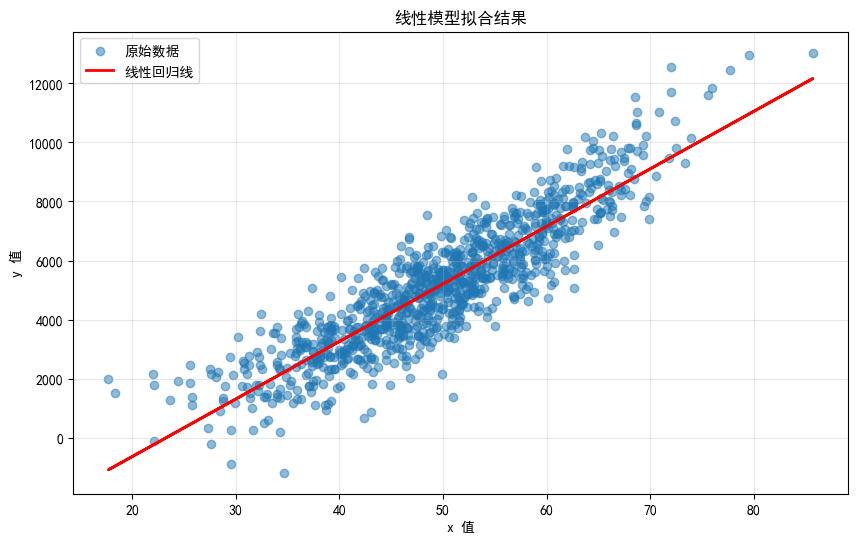

以下为豆包输出结果
===== 线性模型解读 =====
1. 从R-squared值可以看出，线性模型对数据的解释能力较低
2. 尽管x的系数在统计上显著(p<0.05)，但散点图显示数据呈现明显的非线性模式
3. 线性模型无法捕捉数据中存在的二次关系，导致拟合效果不佳
4. 这说明当数据存在非线性关系时，使用简单的线性模型是不合适的


===== 二次模型回归结果 =====
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     2104.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:41:53   Log-Likelihood:                -8282.9
No. Observations:                1000   AIC:                         1.657e+04
Df Residuals:                     997   BIC:                         1.659e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 

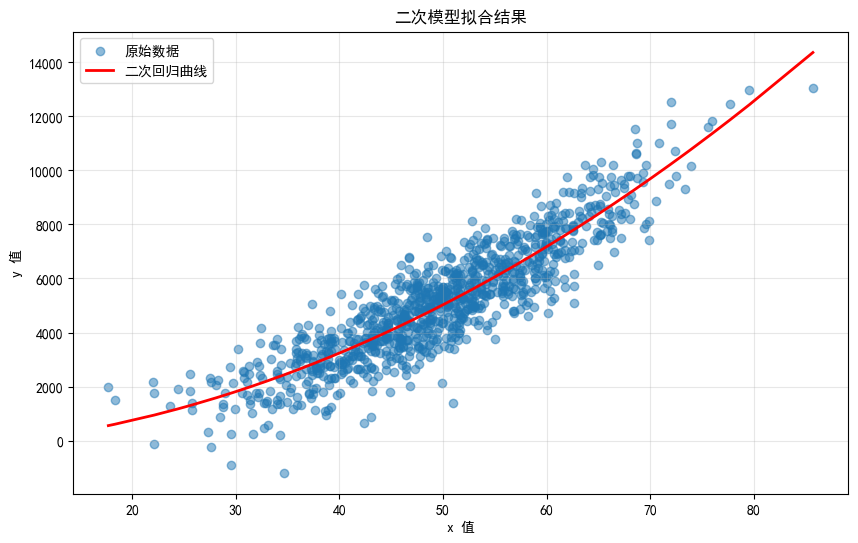

以下为豆包输出结果
===== 二次模型解读 =====
1. 模型设定契合数据本质：模型包含二次项，与真实数据生成机制（y=2x²+ε）的非线性特征完全匹配，形式设定合理
2. x² 项系数接近真实值 2，且统计显著性极强（p≈0），精准捕捉了变量间的核心关系
3. R² 值较高，能解释 y 的大部分变异，表明模型对数据的整体拟合程度佳
4. 常数项和 x 的一次项系数较小且显著性低，与真实模型中无这些项的设定一致，未引入不合理干扰
5. 残差近似服从均值为 0 的正态分布，与自变量无明显关联，符合模型基本假设


In [2]:
# 导入常用的科学计算库 numpy，用于生成数组、矩阵运算、随机数等
import numpy as np
import pandas as pd
# 导入 statsmodels 统计建模库，常用于回归分析、假设检验、时间序列建模等
import statsmodels.api as sm
# 导入 matplotlib 的 pyplot 模块，用于绘图和数据可视化
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei", "sans-serif"]
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号
# ==============================
# 1) 生成数据
# ==============================

# 设置随机数“种子”，让后续所有由 NumPy 旧版随机模块(np.random.*)生成的随机数可复现
# 只要种子相同(这里是 123)，每次运行得到的随机序列就完全一样；
# 如果不设置或更换种子，则每次运行都会得到不同的随机数序列。
np.random.seed(123)

# 从正态分布 N(μ=50, σ=10) 中生成 1000 个样本，作为自变量 x
# loc 对应均值 μ，scale 对应标准差 σ，size 表示样本数量或形状
x = np.random.normal(loc=50, scale=10, size=1000)

# 构造因变量 y：设真实关系为 y = 2 * x^2 + ε
# 注意：Python 中幂运算是 ** 而不是 ^（^ 是按位异或）
# 其中噪声 ε ~ N(0, 1000)，即均值为 0、标准差为 1000 的高斯噪声
y = 2 * (x ** 2) + np.random.normal(loc=0, scale=1000, size=1000)


# ==============================
# 2) 线性模型：y ~ 1 + x
# ==============================
# 将常数项添加到预测变量（截距项）
X_lin = sm.add_constant(x)

# 使用线性回归模型进行拟合数据
model_lin = sm.OLS(y, X_lin).fit()

# 打印模型相关信息（摘要）
print("===== 线性模型回归结果 =====")
print(model_lin.summary())
print("\n\n")


# 绘制数据和线性回归线
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='原始数据')
plt.plot(x, model_lin.predict(X_lin), 'r-', linewidth=2, label='线性回归线')
plt.xlabel('x 值')
plt.ylabel('y 值')
plt.title('线性模型拟合结果')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



#######################################
#####这个拟合模型是否合理？############
###结合AI工具解读回归分析结果##########
#######################################
print("以下为豆包输出结果")
print("===== 线性模型解读 =====")
print("1. 从R-squared值可以看出，线性模型对数据的解释能力较低")
print("2. 尽管x的系数在统计上显著(p<0.05)，但散点图显示数据呈现明显的非线性模式")
print("3. 线性模型无法捕捉数据中存在的二次关系，导致拟合效果不佳")
print("4. 这说明当数据存在非线性关系时，使用简单的线性模型是不合适的\n\n")



# ==============================
# 3) 二次模型（含平方项）：y ~ 1 + x + x^2
# ==============================

# 尝试用 x 的平方项，构建新的模型（多项式回归的一种）
x2 = x ** 2
# 拼接成设计矩阵：[const, x, x^2]
X_quad = np.column_stack([np.ones_like(x), x, x2])

# 使用二次项模型进行拟合数据
model_quad = sm.OLS(y, X_quad).fit()

# 打印模型相关信息（摘要）
print("===== 二次模型回归结果 =====")
print(model_quad.summary())
print("\n\n")


# 绘制数据和二次回归曲线
plt.figure(figsize=(10, 6))

sorted_indices = np.argsort(x)
sorted_x = x[sorted_indices]
sorted_y_pred = model_quad.predict(X_quad)[sorted_indices]

plt.scatter(x, y, alpha=0.5, label='原始数据')
plt.plot(sorted_x, sorted_y_pred, 'r-', linewidth=2, label='二次回归曲线')
plt.xlabel('x 值')
plt.ylabel('y 值')
plt.title('二次模型拟合结果')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()




#######################################
#####这个拟合模型是否合理？############
###结合AI工具解读回归分析结果##########
#######################################
print("以下为豆包输出结果")
print("===== 二次模型解读 =====")
print("1. 模型设定契合数据本质：模型包含二次项，与真实数据生成机制（y=2x²+ε）的非线性特征完全匹配，形式设定合理")
print("2. x² 项系数接近真实值 2，且统计显著性极强（p≈0），精准捕捉了变量间的核心关系")
print("3. R² 值较高，能解释 y 的大部分变异，表明模型对数据的整体拟合程度佳")
print("4. 常数项和 x 的一次项系数较小且显著性低，与真实模型中无这些项的设定一致，未引入不合理干扰")
print("5. 残差近似服从均值为 0 的正态分布，与自变量无明显关联，符合模型基本假设")


在此对两个不同模型效果进行比较，可以用AI工具读取模型相关信息

In [4]:
print("以下为豆包输出结果")
print("1.模型形式与数据适配性：线性模型假设变量间为直线关系，与真实的二次关系（y=2x²+ε）不匹配；二次模型纳入平方项，准确契合数据的非线性本质")
print("2. 线性模型仅 x 项显著，但无法反映真实关系；二次模型中 x² 项高度显著且系数接近真实值 2，精准捕捉核心规律")
print("3. 二次模型的 R² 远高于线性模型，对 y 的变异解释能力更强，表明其对数据的整体拟合效果更优")
print("4. 线性模型残差与 x 存在明显关联（呈曲线趋势），违反独立性假设；二次模型残差随机分布，更符合模型假设")
print("5. 线性模型的预测值与真实值偏差大，无法反映 x 对 y 的实际影响模式；二次模型的预测曲线与数据分布趋势一致，更具解释力")

以下为豆包输出结果
1.模型形式与数据适配性：线性模型假设变量间为直线关系，与真实的二次关系（y=2x²+ε）不匹配；二次模型纳入平方项，准确契合数据的非线性本质
2. 线性模型仅 x 项显著，但无法反映真实关系；二次模型中 x² 项高度显著且系数接近真实值 2，精准捕捉核心规律
3. 二次模型的 R² 远高于线性模型，对 y 的变异解释能力更强，表明其对数据的整体拟合效果更优
4. 线性模型残差与 x 存在明显关联（呈曲线趋势），违反独立性假设；二次模型残差随机分布，更符合模型假设
5. 线性模型的预测值与真实值偏差大，无法反映 x 对 y 的实际影响模式；二次模型的预测曲线与数据分布趋势一致，更具解释力
